## Import Necessary Libraries and Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics
import seaborn as sns

%matplotlib inline

## Load the Preprocessed Data

In [2]:
# load in dataset
df = pd.read_csv('../data/processed/lin_filtered_data.csv', header=None, low_memory=False)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
0,-0.031,-0.024,-0.021,-4.109,0.003,-0.103000,2.551,3.024,-0.442,-0.001,...,0.030,-0.028,-0.033,0.046,0.058,-0.087,0.035,-0.007,False,a119e_l125p
1,-0.019,0.006,-0.038,-4.111,0.006,-0.054667,-0.002,2.952,-0.366,0.009,...,0.005,-0.018,-0.016,0.021,0.047,-0.035,0.011,0.005,False,a119e_r283k_a353v
2,-0.036,-0.056,-0.033,-4.107,-0.012,-0.099333,-0.002,3.031,-0.089,-0.019,...,0.028,-0.033,-0.038,0.044,0.074,-0.076,0.036,-0.018,False,c135y
3,-0.058,-0.116,-0.039,-4.106,-0.038,-0.134333,-0.017,-0.033,-0.056,-0.046,...,0.053,-0.050,-0.061,0.061,0.126,-0.124,0.059,-0.049,False,c135y_e285m
4,-0.011,0.012,-0.037,-4.110,0.011,-0.057333,0.000,2.974,-0.362,0.017,...,0.005,-0.013,-0.008,0.016,0.024,-0.035,0.009,0.013,False,c135y_e285v


#### Correlation Heatmap for All Features

Text(0.5, 1.0, 'Correlation Heatmap')

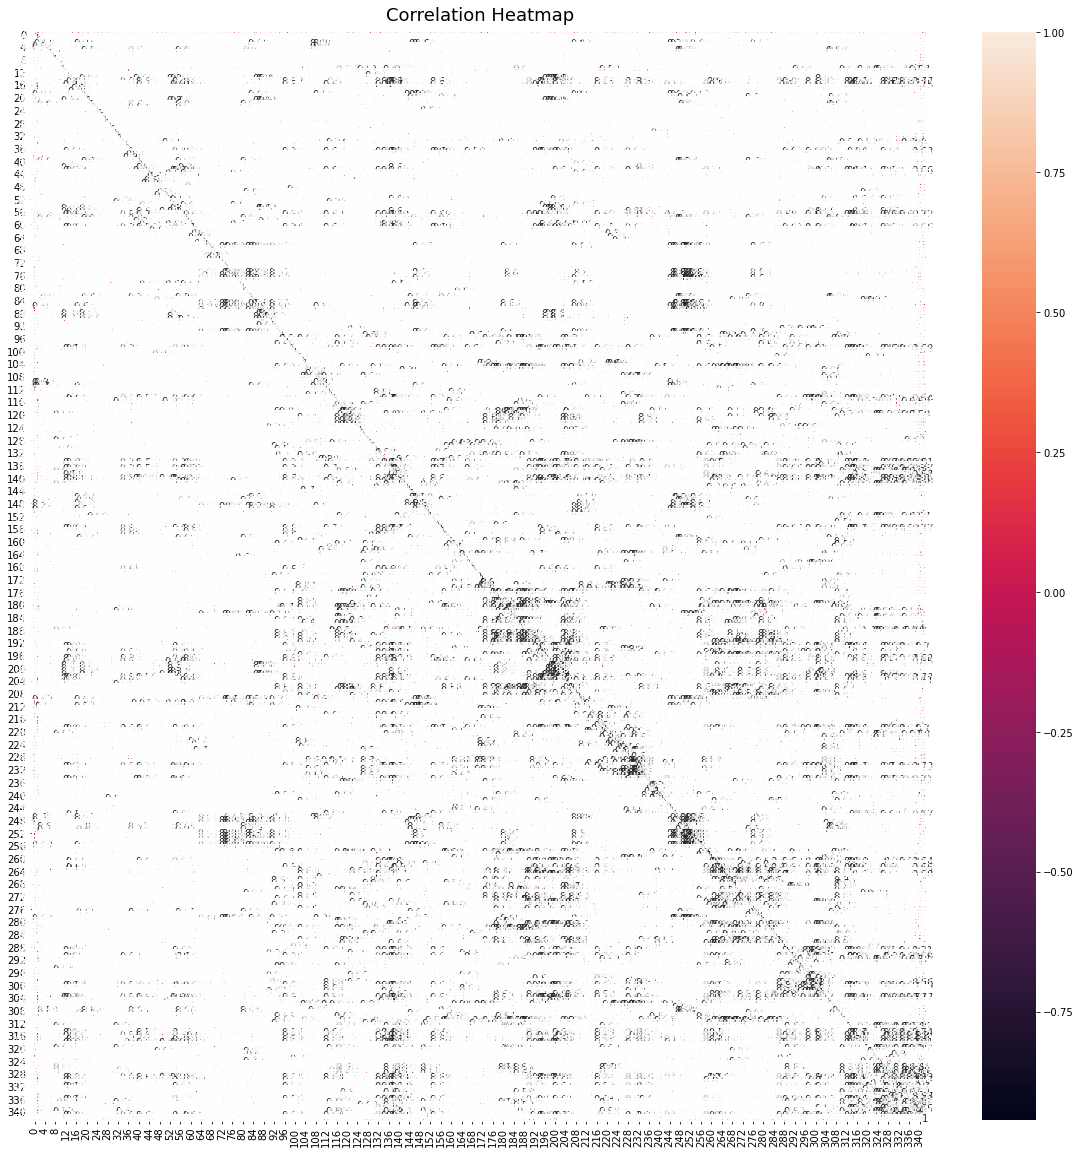

In [5]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

This heatmap shows ____

#### Pop Out Nametags Column

In [11]:
nametags = df.pop(343)
nametags

0              a119e_l125p
1        a119e_r283k_a353v
2                    c135y
3              c135y_e285m
4              c135y_e285v
               ...        
16586    y220c_t230c_n239y
16587    y220c_y234f_n239l
16588                y234c
16589          y234c_a119e
16590          y234f_n239l
Name: 343, Length: 16591, dtype: object

In [13]:
df.rename({342: 'activity'}, axis='columns', inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,activity
0,-0.031,-0.024,-0.021,-4.109,0.003,-0.103000,2.551,3.024,-0.442,-0.001,...,0.050,0.030,-0.028,-0.033,0.046,0.058,-0.087,0.035,-0.007,False
1,-0.019,0.006,-0.038,-4.111,0.006,-0.054667,-0.002,2.952,-0.366,0.009,...,0.034,0.005,-0.018,-0.016,0.021,0.047,-0.035,0.011,0.005,False
2,-0.036,-0.056,-0.033,-4.107,-0.012,-0.099333,-0.002,3.031,-0.089,-0.019,...,0.053,0.028,-0.033,-0.038,0.044,0.074,-0.076,0.036,-0.018,False
3,-0.058,-0.116,-0.039,-4.106,-0.038,-0.134333,-0.017,-0.033,-0.056,-0.046,...,0.076,0.053,-0.050,-0.061,0.061,0.126,-0.124,0.059,-0.049,False
4,-0.011,0.012,-0.037,-4.110,0.011,-0.057333,0.000,2.974,-0.362,0.017,...,0.024,0.005,-0.013,-0.008,0.016,0.024,-0.035,0.009,0.013,False


# Model 1: Random Forest

The first classification model that I'll be using is a Random Forest Classifier with two different methods of hyperparameter optimization: RandomSearch and Bayesian Optimization.

In [17]:
# import from sklearn
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

### Create Train/Test Split

In [19]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y
X = df.iloc[:, 0:341] # features
y = df.activity # target variable

feature_list = list(X.columns) # save feature names for later

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=420)

### Scale Data to Prepare for Model Creation

In [20]:
from sklearn.preprocessing import MaxAbsScaler

# build scaler based on training data and apply it to test data to then also scale the test data
scaler = MaxAbsScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Train and Fit the RandomForestClassifier Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 500, random_state=420, n_jobs=-1)

model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.994
Random Forest: f1-score=0.991


The Random Forest classifier model shows an overall accuracy of 99.4% and an F1-score of 0.991 - both of which are very good! However, this model must further be evaluated to make sure that the accuracy is not this high due to overfitting.

### Evaluate Model Performance

In [ ]:
# import from sklearn



# Model 2: Random Forest with RandomizedSearchCV

# Model 3: Random Forest with Bayesian Optimization